In [65]:
# Import Modules
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split 
import time
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
import pickle
import matplotlib.pyplot as plt
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')

In [2]:
# Load dataset
dataset=pd.read_csv("dataset.csv",index_col=None)
dataset

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,2.000000,76.459948,c,3.0,0.0,normal,abnormal,notpresent,notpresent,148.112676,...,38.868902,8408.191126,4.705597,no,no,no,yes,yes,no,yes
1,3.000000,76.459948,c,2.0,0.0,normal,normal,notpresent,notpresent,148.112676,...,34.000000,12300.000000,4.705597,no,no,no,yes,poor,no,yes
2,4.000000,76.459948,a,1.0,0.0,normal,normal,notpresent,notpresent,99.000000,...,34.000000,8408.191126,4.705597,no,no,no,yes,poor,no,yes
3,5.000000,76.459948,d,1.0,0.0,normal,normal,notpresent,notpresent,148.112676,...,38.868902,8408.191126,4.705597,no,no,no,yes,poor,yes,yes
4,5.000000,50.000000,c,0.0,0.0,normal,normal,notpresent,notpresent,148.112676,...,36.000000,12400.000000,4.705597,no,no,no,yes,poor,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,51.492308,70.000000,a,0.0,0.0,normal,normal,notpresent,notpresent,219.000000,...,37.000000,9800.000000,4.400000,no,no,no,yes,poor,no,yes
395,51.492308,70.000000,c,0.0,2.0,normal,normal,notpresent,notpresent,220.000000,...,27.000000,8408.191126,4.705597,yes,yes,no,yes,poor,yes,yes
396,51.492308,70.000000,c,3.0,0.0,normal,normal,notpresent,notpresent,110.000000,...,26.000000,9200.000000,3.400000,yes,yes,no,poor,poor,no,yes
397,51.492308,90.000000,a,0.0,0.0,normal,normal,notpresent,notpresent,207.000000,...,38.868902,8408.191126,4.705597,yes,yes,no,yes,poor,yes,yes


In [3]:
dataset.isnull().sum()

age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hrmo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64

In [5]:
dataset.columns

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hrmo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [9]:
# 1️⃣ Import required libraries
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2  # For classification (categorical target)

# 2️⃣ Load your dataset
# Example:
data = pd.read_csv("dataset.csv")

data = pd.get_dummies(data, drop_first=True).astype(int)
data

,age,bp,al,su,bgr,bu,sc,sod,pot,hrmo,...,pc_normal,pcc_present,ba_present,htn_yes,dm_yes,cad_yes,appet_yes,pe_yes,ane_yes,classification_yes
0,2,76,3,0,148,57,3,137,4,12,...,0,0,0,0,0,0,1,1,0,1
1,3,76,2,0,148,22,0,137,4,10,...,1,0,0,0,0,0,1,0,0,1
2,4,76,1,0,99,23,0,138,4,12,...,1,0,0,0,0,0,1,0,0,1
3,5,76,1,0,148,16,0,138,3,8,...,1,0,0,0,0,0,1,0,1,1
4,5,50,0,0,148,25,0,137,4,11,...,1,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
394,51,70,0,0,219,36,1,139,3,12,...,1,0,0,0,0,0,1,0,0,1
395,51,70,0,2,220,68,2,137,4,8,...,1,0,0,1,1,0,1,0,1,1
396,51,70,3,0,110,115,6,134,2,9,...,1,0,0,1,1,0,0,0,0,1
397,51,90,0,0,207,80,6,142,5,8,...,1,0,0,1,1,0,1,0,1,1



📊 Top 6 Features Based on Chi-Square Scores:
   Feature         Score
11      wc  12823.671057
4      bgr   2439.110915
5       bu   2347.681529
6       sc    415.624479
10     pcv    339.895333
2       al    216.265060

🏆 Selected Features for Model Training: ['al', 'bgr', 'bu', 'sc', 'pcv', 'wc']

🚀 ROC-AUC Score: 0.9972


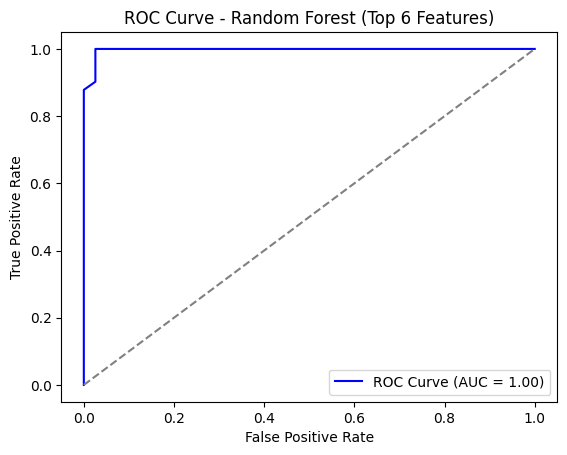


📈 Accuracy: 0.975

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        39
           1       0.98      0.98      0.98        41

    accuracy                           0.97        80
   macro avg       0.97      0.97      0.97        80
weighted avg       0.97      0.97      0.97        80


Confusion Matrix:
 [[38  1]
 [ 1 40]]


In [75]:
# 1️⃣ Import required libraries
import pandas as pd
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt

# 2️⃣ Load dataset
data = pd.read_csv("dataset.csv")

#data.to_csv("dataset_new.csv", index=False)

# One-hot encode categorical variables (drop_first avoids dummy variable trap)
data = pd.get_dummies(data, drop_first=True).astype(int)

# 3️⃣ Split independent (X) and dependent (y) variables
X = data.drop(columns=['classification_yes'])
y = data['classification_yes']

# 4️⃣ Apply SelectKBest (Top 6 features)
bestfeatures = SelectKBest(score_func=chi2, k=6)
fit = bestfeatures.fit(X, y)

# 5️⃣ Create DataFrame for scores
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

featureScores = pd.concat([dfcolumns, dfscores], axis=1)
featureScores.columns = ['Feature', 'Score']

# 🔥 Print top 6 features and their scores
print("\n📊 Top 6 Features Based on Chi-Square Scores:")
print(featureScores.nlargest(6, 'Score'))

# Extract selected feature names
selected_features = X.columns[fit.get_support()]
print("\n🏆 Selected Features for Model Training:", selected_features.tolist())

# 6️⃣ Create new dataset with only selected features
X_selected = X[selected_features]



# 7️⃣ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# 8️⃣ Build Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


# 9️⃣ Predictions and probabilities
y_pred = rf.predict(X_test)
y_pred_prob = rf.predict_proba(X_test)[:, 1]

# 🔟 Evaluate ROC-AUC
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"\n🚀 ROC-AUC Score: {roc_auc:.4f}")

# 11️⃣ Plot ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest (Top 6 Features)')
plt.legend()
plt.show()

# 12️⃣ Extra Evaluation
print("\n📈 Accuracy:", round(accuracy_score(y_test, y_pred), 3))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


In [76]:
#save model
import pickle
filename="final_RF_Model.sav"
pickle.dump(rf,open(filename,'wb'))

#load model
load_model=pickle.load(open("final_RF_Model.sav",'rb'))

# predict
albumin_level = 0
blood_glucose_random = 100
blood_urea = 26
serum_creatinine = 0.6
packed_cell_volume = 49
White_blood_cell_count = 6600

result=load_model.predict([[albumin_level, blood_glucose_random, blood_urea, serum_creatinine, packed_cell_volume, White_blood_cell_count]])
print(result)
# 5️⃣ Print result
if result[0] == 1:
    print("🩺 The patient is likely to have Chronic Kidney Disease (CKD).")
else:
    print("✅ The patient is likely NOT to have Chronic Kidney Disease (CKD).")

[0]
✅ The patient is likely NOT to have Chronic Kidney Disease (CKD).
